In this notebook we generate results for brute force, greedy, convex, lasso, and two stage approaches on the wine and flower datasets.

In [4]:
%load_ext autoreload
%autoreload 2
import sklearn
# from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from sklearn.datasets import load_wine, load_iris

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
wine = load_wine()
print(wine.keys())
P_wine, D_wine = wine['data'].shape
print("D_wine", D_wine)
print("P_wine", P_wine)
print(wine['feature_names'])
wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
D_wine 13
P_wine 178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


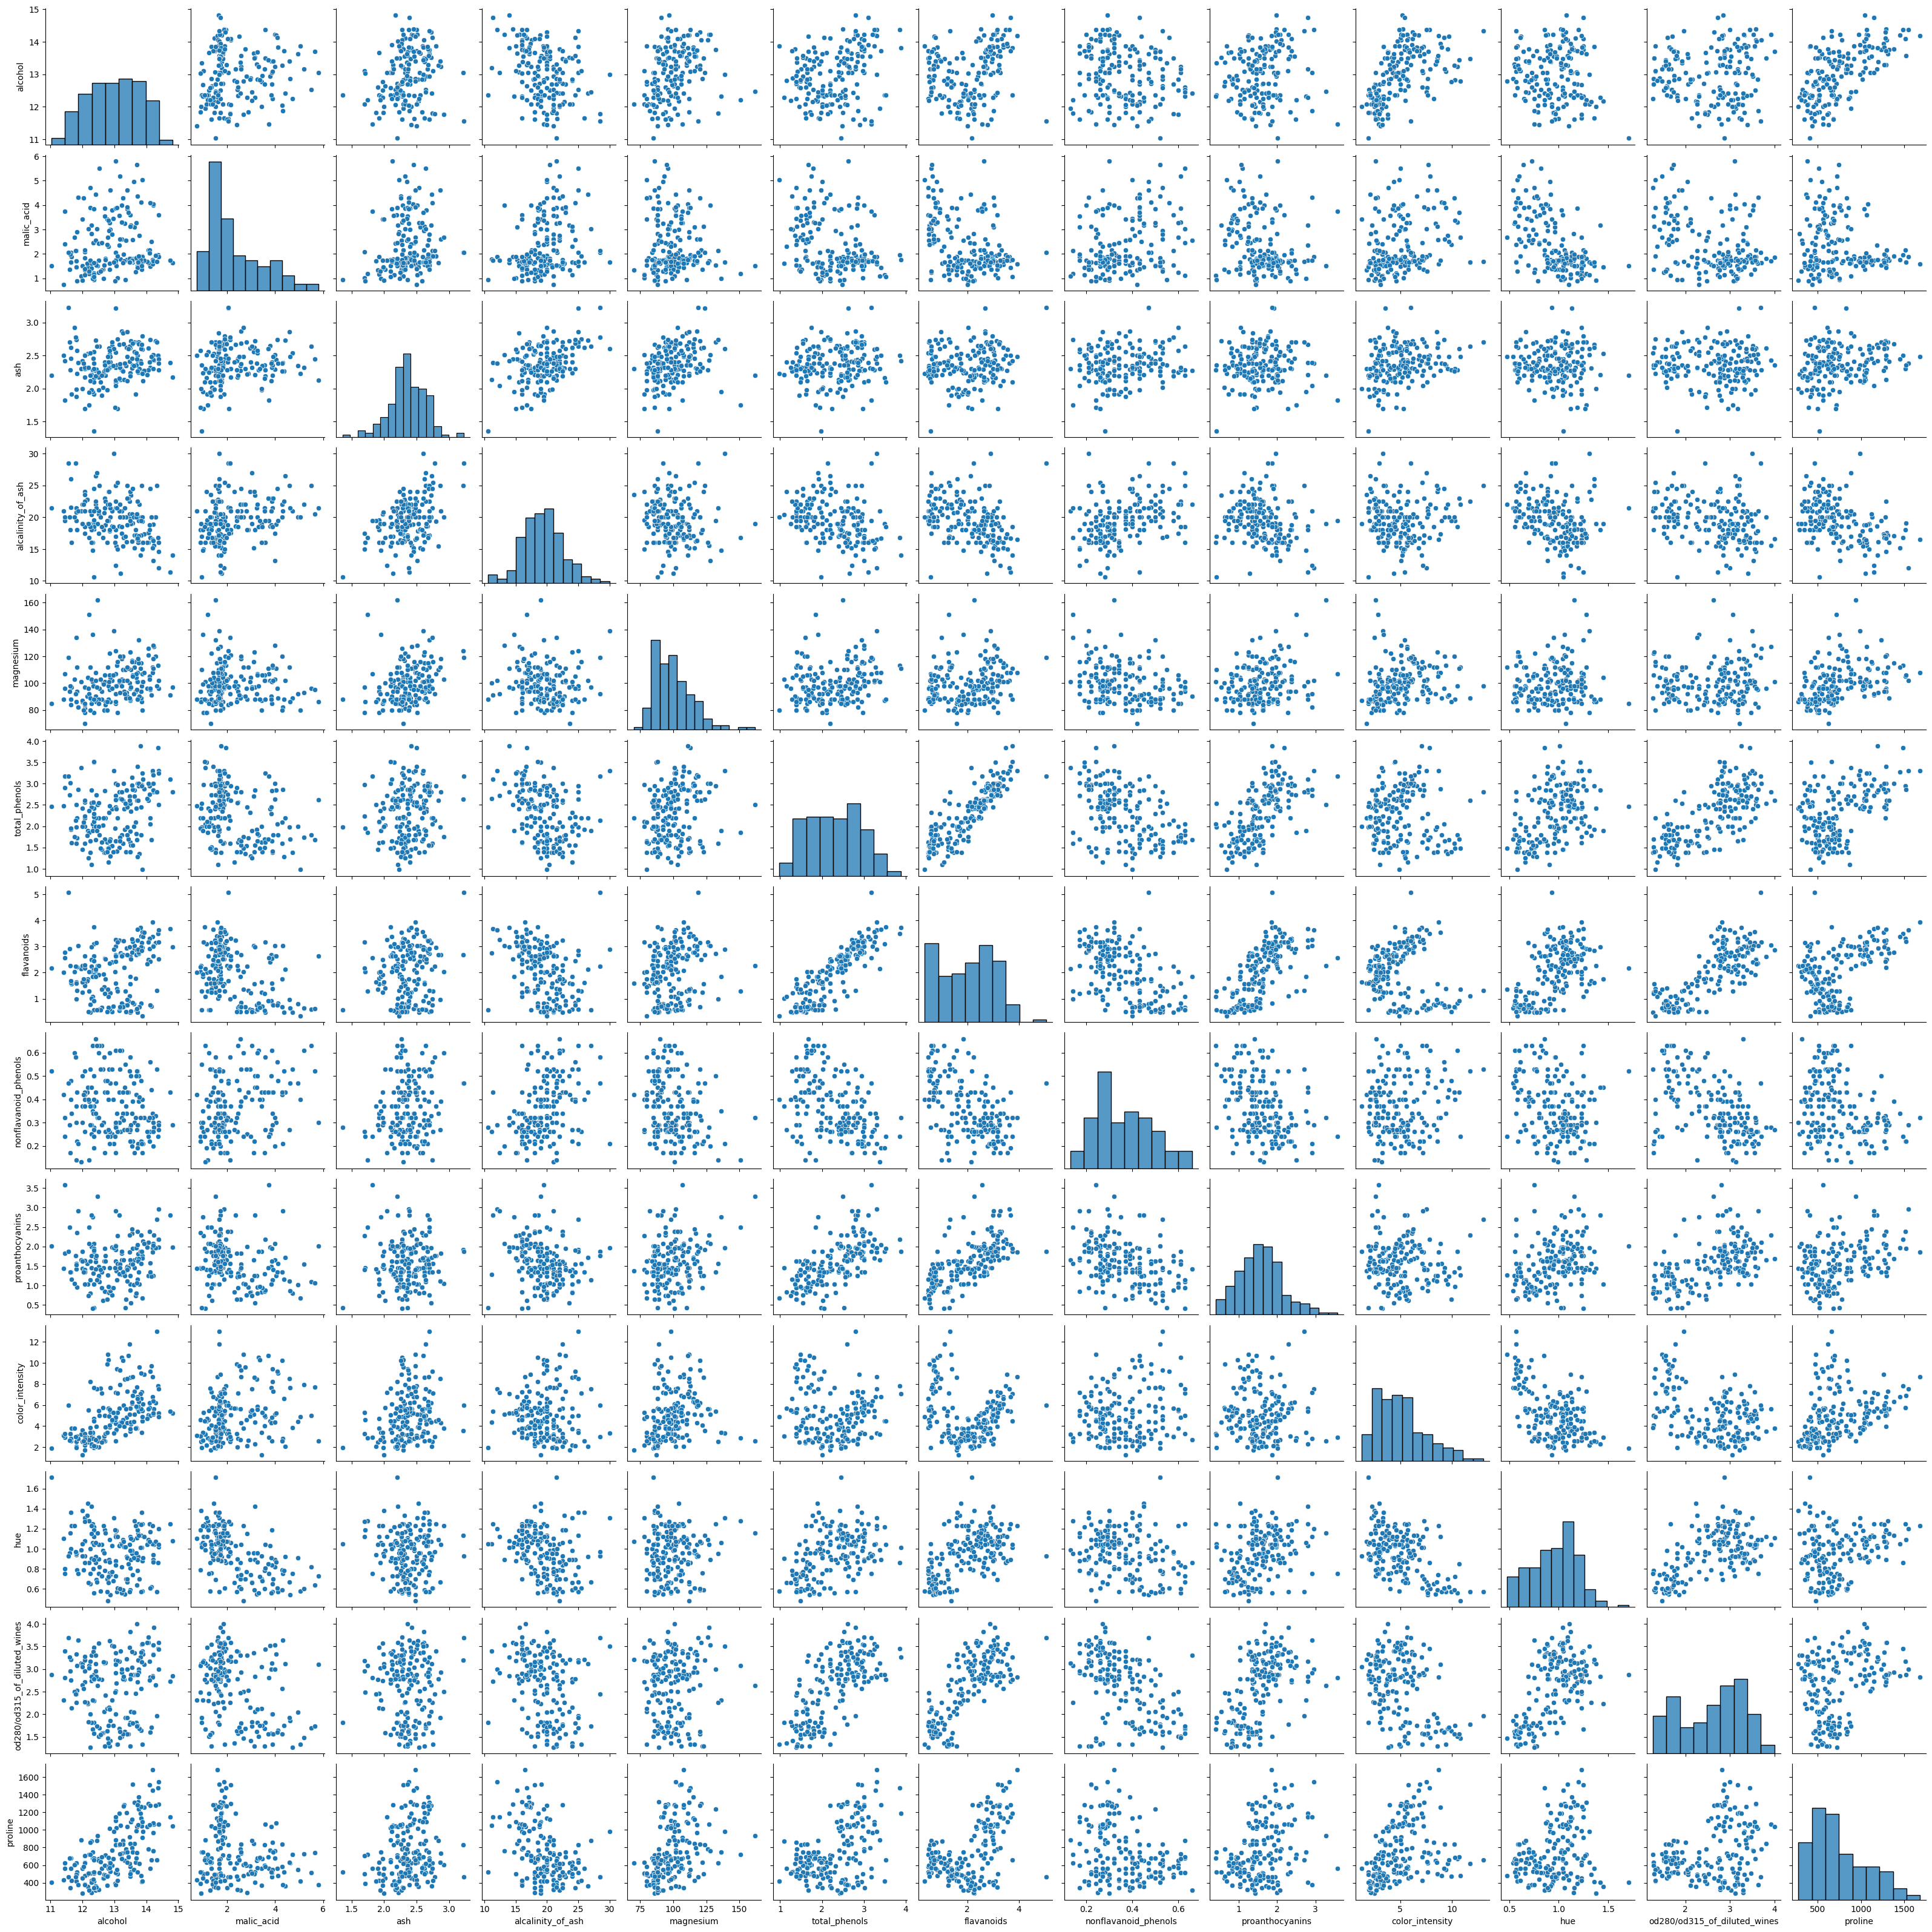

In [8]:
sns.pairplot(wine_df)

In [9]:
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

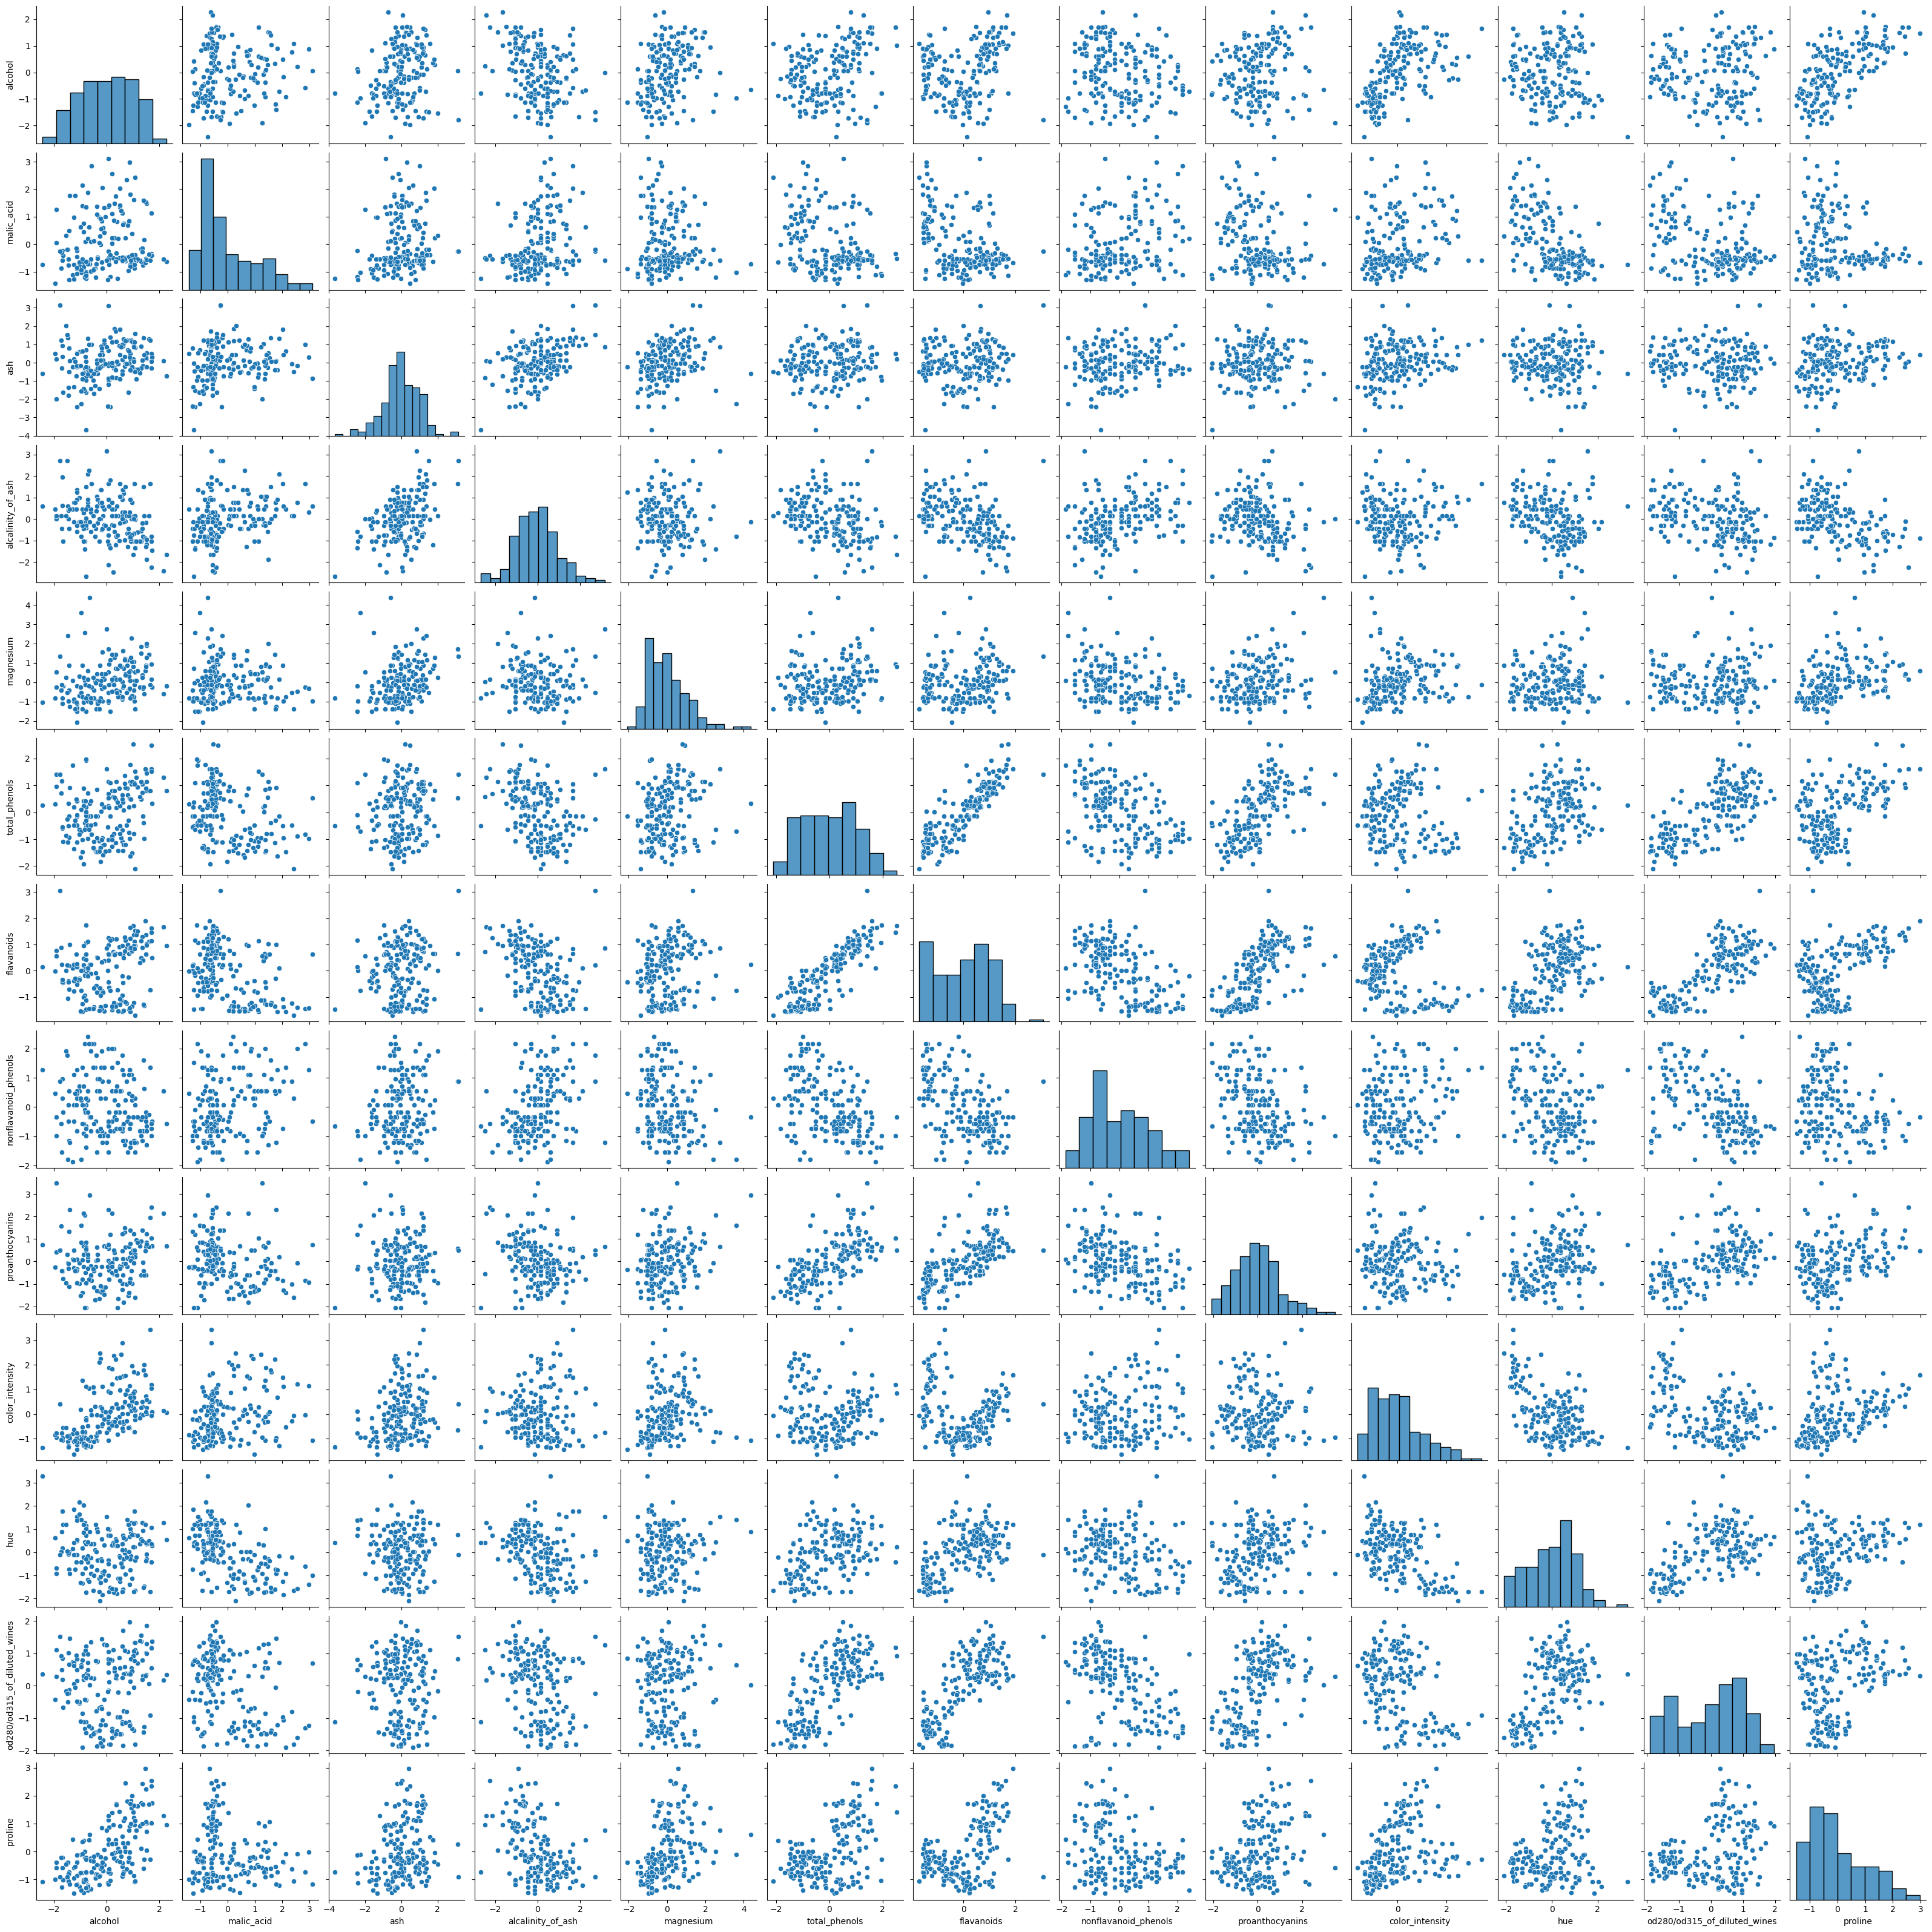

In [10]:
sns.pairplot(wine_standardized)

In [11]:
iris = load_iris()
print(iris.keys())
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print("P_iris", P_iris)
print(wine['feature_names'])
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names']) # label with class names?


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
D_iris 4
P_iris 150
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


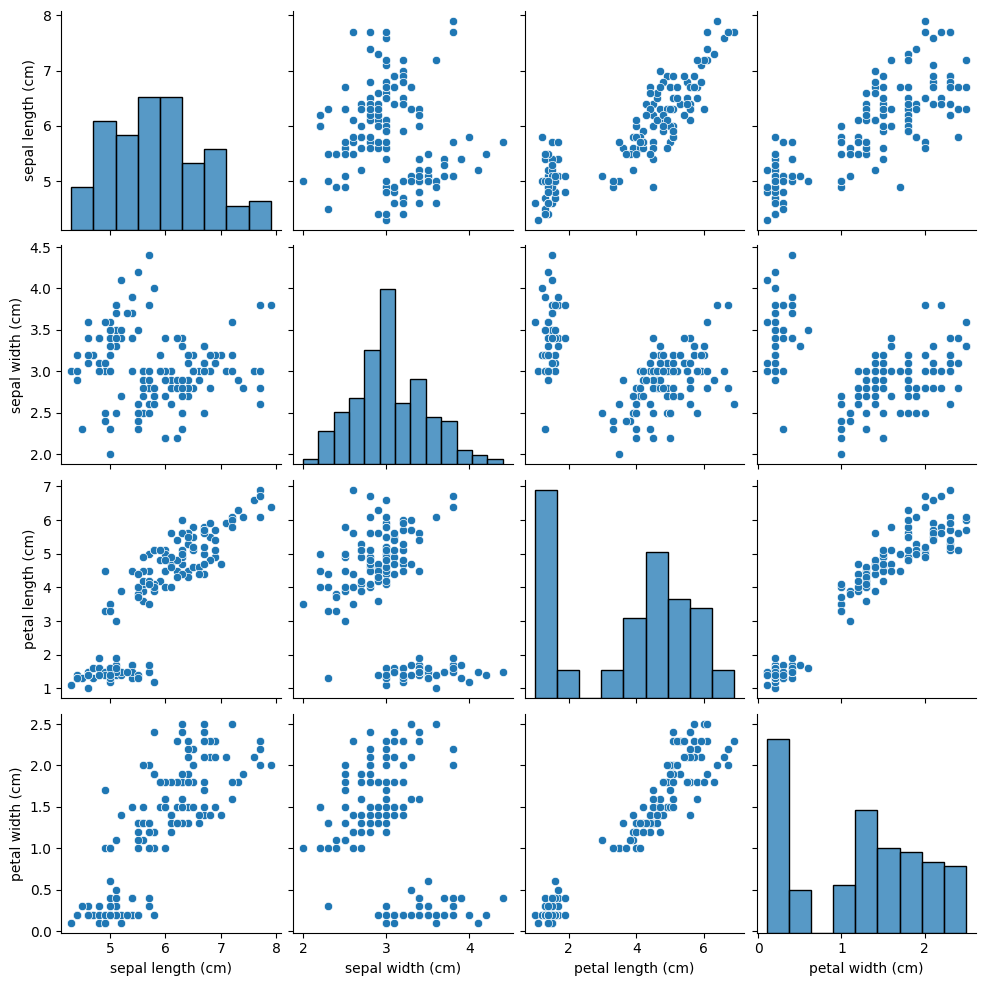

In [12]:
sns.pairplot(iris_df)

In [13]:
scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])


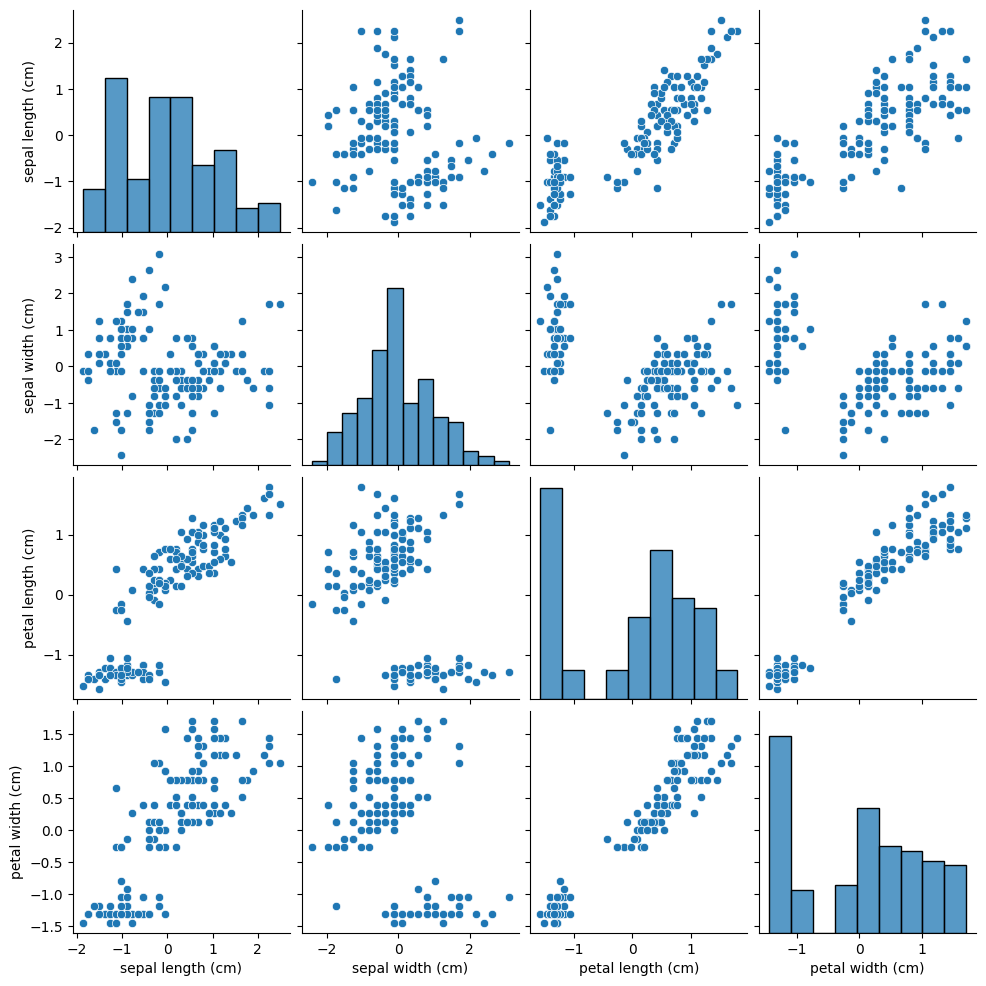

In [14]:
sns.pairplot(iris_standardized)

In [15]:
from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from convexlocalisometry.algorithm import greedy, brute, group_basis_pursuit, group_lasso
from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# brute(wine_standardized.transpose().to_numpy(), isometry_loss,D_wine) # plainly this is too hard 178**13 combinations

In [17]:
brute(iris_standardized.transpose().to_numpy(), isometry_loss, D_iris) # plainly this is too hard 178**13 combinations

Computing brute force solution for dictionary dimension 150 and target_dimension 4


0it [00:00, ?it/s]/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
1805211it [01:07, 26621.96it/s]

KeyboardInterrupt



In [18]:

def brute(matrix, loss, target_dimension):

    dictionary_dimension = matrix.shape[1]
    print(f'Computing brute force solution for dictionary dimension {dictionary_dimension} and target_dimension {target_dimension}')
    parametrizations = combinations(range(dictionary_dimension), target_dimension)

    losses = []
    for parametrization in tqdm(parametrizations):
        putative_X_S = matrix[:,parametrization]
        losses.append(loss(putative_X_S))

    selected_indices = np.asarray(losses).argmin()
    parametrizations = combinations(range(dictionary_dimension), target_dimension)
    return list(parametrizations)[selected_indices]


In [19]:
from itertools import combinations
from tqdm import tqdm

brute(iris_standardized.transpose().to_numpy(), isometry_loss, 4)

Computing brute force solution for dictionary dimension 150 and target_dimension 4


0it [00:00, ?it/s]/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
90553it [00:03, 27657.92it/s]


KeyboardInterrupt: 

In [20]:
iris_standardized.shape

(150, 4)

In [21]:
output = greedy(iris_standardized.transpose().to_numpy(), isometry_loss, D_iris) # plainly this is too hard 178**13 combinations

138
67
65
98


In [22]:
np.linalg.svd(iris_standardized.transpose().iloc[:,output])[1]

array([1.96193284, 1.14481419, 0.7203766 , 0.2942927 ])

In [23]:
np.linalg.svd(iris_standardized.transpose().iloc[:,:4])[1]

array([4.54621775, 0.916528  , 0.28566818, 0.0543122 ])

In [24]:
output = greedy(wine_standardized.transpose().to_numpy(), isometry_loss, D_wine) # plainly this is too hard 178**13 combinations

43
102
37
41
32
117
79
72
29


/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)


In [25]:
np.linalg.svd(wine_standardized.transpose().iloc[:,output])[1]

array([5.354362  , 4.48649381, 3.62437333, 3.53469884, 2.4982982 ,
       2.22005545, 1.70965293, 1.4454057 , 1.21611443, 1.08960232,
       0.7600742 , 0.47370421, 0.3922084 ])

In [26]:
np.linalg.svd(wine_standardized.transpose().iloc[:,:14])[1]

array([11.57978389,  4.28254422,  3.40165029,  2.53898857,  2.40403749,
        1.98796873,  1.73280646,  1.44937598,  1.08998689,  0.76727592,
        0.53544212,  0.18000293,  0.0183936 ])

In [27]:
150**4 / 15000 # 10 hours

33750.0

In [28]:
# should we compute the rank of the data?  Yes probably for supplement.

In [29]:
# theres no reason target dimension must match feature dimension....
# target_dimension needs to be smaller than feature dimension

In [31]:
print('Computing isometry pursuit solution')
beta = group_basis_pursuit(wine_standardized.to_numpy().transpose())

Computing isometry pursuit solution


In [32]:
np.where(np.linalg.norm(beta, axis = 1))[0]

array([ 13,  18,  39,  61,  64,  67,  68,  69,  70,  71,  73,  74,  76,
        84,  94,  95,  96,  98,  99, 105, 107, 110, 112, 115, 121, 123,
       126, 130, 133, 136, 137, 139, 150, 158, 167])

In [111]:
D = 5
simulated_data = np.random.multivariate_normal(np.zeros(20), np.identity(20), D) # 28 has inconsistent
data = exponential_transformation(simulated_data)
data = data / np.linalg.norm(data, axis = 0)
data[:D,:D] = np.identity(D)
beta = group_basis_pursuit(data, eps = 1e-16, threshold = 1e-6)
np.linalg.norm(data, axis = 0)
np.where(np.linalg.norm(beta, axis = 1))[0]

array([0, 1, 2, 3, 4])

In [229]:
D = 2
P = 6
simulated_data = np.random.multivariate_normal(np.zeros(P), np.identity(P), D)
data = exponential_transformation(simulated_data)
data = data / np.linalg.norm(data, axis = 0)
beta = group_basis_pursuit(data)
np.linalg.norm(data, axis = 0)
np.where(np.linalg.norm(beta, axis = 1))[0]

data[:D,:D] = np.identity(D)
betaprimeS = data[:,:D] @ beta[:D,:]
xsc = data[:,5:]
betasc = beta[5:,]

print(group_lasso_norm(betaprimeS + xsc @ betasc))
print(group_lasso_norm(betaprimeS) + group_lasso_norm(betasc))
print(group_lasso_norm(xsc @ betasc), (xsc @ betasc).shape)
print(group_lasso_norm(betasc), betasc.shape)

1.304471985787862
1.3828149691229281
0.18902392981617971 (2, 2)
0.17740458235491982 (1, 2)


In [335]:
# np.random.seed(6) # good for illustrating success (when selected functions are not all within putative support)
np.random.seed(5) # good for illustrating failure (when selected functions are all within putative support)
# Issue: this is making a D sparse solution not D sparse.
D = 2
P = 3
simulated_data = np.random.multivariate_normal(np.zeros(P), np.identity(P), D)
data = exponential_transformation(simulated_data)
data = data / np.linalg.norm(data, axis = 0)
# data[:,:D] = np.identity(D)*.000001
# data[:,:D] = np.zeros((D, D))
beta = group_basis_pursuit(data)
print(np.linalg.norm(data, axis = 0), np.where(np.linalg.norm(beta, axis = 1))[0])
X_prime = data.copy()
X_prime[:D,:D] = np.identity(D)
betaprimeS = data[:,:D] @ beta[:D,:]
xsc = data[:,D:]
betasc = beta[D:,]

print(group_lasso_norm(beta[:D,:]), group_lasso_norm(betaprimeS))
print(group_lasso_norm(betaprimeS + xsc @ betasc))
print(group_lasso_norm(betaprimeS) + group_lasso_norm(betasc))
print(group_lasso_norm(xsc @ betasc), (xsc @ betasc).shape)
print(group_lasso_norm(betasc), betasc.shape)
print(group_lasso_norm(betaprimeS), betaprimeS.shape)

[1. 1. 1.] [0 2]
1.1242711432541448 1.5339083346361493
2.0
2.658179477890293
1.5555887435401248 (2, 2)
1.1242711432541437 (1, 2)
1.5339083346361493 (2, 2)


In [309]:
data[:,:1] , beta[:1,:]

(array([[-0.24391068],
        [-0.13587897],
        [-0.06557226],
        [-0.95785648],
        [-0.01599159]]),
 array([[-0.23068055, -0.0857928 ,  0.15077681, -0.6080115 , -0.09782664]]))

In [310]:
np.outer(data[:,:1], beta[:1,:])

array([[ 0.05626545,  0.02092578, -0.03677607,  0.1483005 ,  0.02386096],
       [ 0.03134464,  0.01165744, -0.0204874 ,  0.08261598,  0.01329258],
       [ 0.01512625,  0.00562563, -0.00988678,  0.03986869,  0.00641471],
       [ 0.22095886,  0.08217719, -0.14442255,  0.58238775,  0.09370388],
       [ 0.00368895,  0.00137196, -0.00241116,  0.00972307,  0.0015644 ]])

In [306]:
data[:,:1] @ beta[:1,:]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [307]:
data

array([[-0.11205133, -0.77496765,  0.03690424, -0.53383996,  0.08960651,
         0.77235422,  0.32316554,  0.26995101, -0.40049283, -0.00634802,
        -0.33978544,  0.13679791, -0.65379787, -0.69292606,  0.40677535],
       [-0.40006291,  0.39432754,  0.68499103, -0.50004247, -0.75518448,
         0.58257978,  0.2759434 ,  0.20026422,  0.08139981, -0.66757314,
        -0.37654611,  0.72363871,  0.27917828, -0.32035501, -0.28753686],
       [ 0.36346538, -0.26047649, -0.61999085, -0.45300081, -0.26445299,
         0.03125143,  0.69742687, -0.28432781,  0.5976226 , -0.01769725,
         0.6810279 ,  0.28355207,  0.62285802, -0.15769411,  0.77489428],
       [-0.8149065 , -0.40899741, -0.06746395,  0.11509417, -0.56128541,
         0.18183723, -0.50812887,  0.84547981, -0.49004741,  0.61317597,
        -0.39590174, -0.22861519, -0.29437119, -0.33953112, -0.10512466],
       [-0.1766762 ,  0.09382986, -0.37481373, -0.4965038 , -0.19154736,
        -0.17328685,  0.27353261, -0.30222885, 

In [285]:
data[:,:1] , beta[:1,:], np.linalg.norm(data[:,:1])#, np.linalg.norm(beta[:1,:])

(array([[-0.84116236],
        [-0.54078265]]),
 array([[-0.80126323, -0.51513153]]),
 1.0)

In [273]:
betaprimeS

array([[0.6766981 , 0.40995469],
       [0.40995469, 0.48016745]])

In [250]:
betaprimeS + xsc @ betasc

array([[1.00000000e+00, 4.16333634e-17],
       [7.63278329e-17, 1.00000000e+00]])

In [251]:
data @ beta

array([[1.00000000e+00, 3.98151071e-17],
       [7.48689708e-17, 1.00000000e+00]])

(0.2784711108210835, (2, 2))

0.22124732084374948 (1, 2)


In [163]:
# what are the conditions we expect this not to be true?  High d relative to p
xsc = data[:,5:]
betasc = beta[5:,]
print(group_lasso_norm(xsc @ betasc), group_lasso_norm(betasc))
group_lasso_norm(xsc @ betasc) <= group_lasso_norm(betasc)

3.6644217669559715 3.3333542033191286


False

In [ ]:
# what are the conditions we expect this not to be true?  High d relative to p
xsc = data[:,5:]
betasc = beta[5:,]
print(group_lasso_norm(xsc @ betasc), group_lasso_norm(betasc))
group_lasso_norm(xsc @ betasc) <= group_lasso_norm(betasc)

In [139]:
from convexlocalisometry.loss import group_lasso_norm
gamma = data[:,5:]
data[:,:5] @ gamma == data[:,5:]


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  Tru

In [140]:
5 - (group_lasso_norm(beta[:5,:]) + group_lasso_norm(beta[5:,:]))

0.0

In [141]:
beta.shape

(100, 5)

In [142]:
np.where(np.linalg.norm(beta, axis = 1))[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [37]:
??exponential_transformation

In [36]:
??group_basis_pursuit

In [49]:
print('Computing isometry pursuit solution')
beta = group_basis_pursuit(iris_standardized.to_numpy().transpose())

Computing isometry pursuit solution


In [50]:
basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]

In [51]:
brute(iris_standardized.transpose().to_numpy()[:,basis_pursuit_indices], isometry_loss, D_iris) # plainly this is too hard 178**13 combinations

Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 18691.19it/s]


(1, 3, 5, 7)

In [54]:
np.linalg.svd(iris_standardized.transpose().to_numpy()[:,basis_pursuit_indices[[1,3,5,7]]])[1]

array([2.94892267, 2.11078457, 1.07576766, 0.61053445])

In [65]:
from convexlocalisometry.algorithm import group_basis_pursuit
from convexlocalisometry.loss import group_lasso_norm
power = 1
matrix_values = np.linspace(0.1, 2, 10)
rearranged_matrix_values = np.asarray(rearrange(matrix_values, 'n -> n 1 1'))
transformed_values = np.asarray([exponential_transformation(rmv, power) for rmv in rearranged_matrix_values])
betas = np.asarray([group_basis_pursuit(tv) for tv in transformed_values])

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [60]:
beta = group_lasso(iris_standardized.to_numpy().transpose(), .0001)

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:2555: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.86118171994165e-13, tolerance: 4e-16
  ) = cd_fast.enet_coordinate_descent_multi_task(


In [61]:
basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]

In [62]:
basis_pursuit_indices

array([0, 1, 2, 3])